# Import Modules 

In [1]:
import pandas as pd, matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, PredefinedSplit

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

<h2> Load Dataset <h2> 

In [2]:
df = pd.read_csv("Dataset/balance_train.csv").set_index('Unnamed: 0')
df.sample(5)

,category,amt,gender,city_pop,is_fraud,trans_date,trans_time,time_of_day,Age
Unnamed: 0,,,,,,,,,
1167355,6,73.50,1,49,0,486,54498,0,0
468862,11,1174.24,1,804,1,205,79538,3,0
745115,4,310.66,1,744,1,318,11122,3,0
377385,4,76.62,0,530,0,173,25656,2,0
245710,9,195.25,0,136,0,122,48111,0,2


In [3]:
# number of rows and columns 
df.shape

(15012, 9)

In [4]:
# Model building 
# Ada Boost Classifier
# XGBoost Classifier
# Random Forest Classifier
# DNN classifier 
# Decision Tree Classifier 
# Gradient Boost Classifier 

In [5]:
# identifying features and target varibales  
feature_col = df.drop(['is_fraud'], axis=1)
target_col = df['is_fraud']

In [6]:
# training set and test test 
X_train, X_test, y_train, y_test = train_test_split(feature_col, target_col, test_size=0.3, stratify=target_col, random_state=36)

# training test and validation test 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=12)

In [7]:
rf = RandomForestClassifier()

In [8]:
rf_cv_params = {'n_estimators' : [50, 100, 150 , 200], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50], 'min_samples_leaf': [2, 5, 10, 20, 50], 'min_samples_split': [2, 4, 6], 'max_features' : ["sqrt"], 'max_samples' : [.5,.9]}

scores = {'accuracy': 'accuracy' , 'precision':'precision', 'recall' : 'recall', 'f1':'f1'}

In [9]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [10]:
%%time 
rf_val = GridSearchCV(rf, rf_cv_params, cv=custom_split, scoring=scores, refit='f1', n_jobs=-1, verbose=1)
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 1680 candidates, totalling 1680 fits
CPU times: total: 8.45 s
Wall time: 1min 59s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=1)

In [11]:
#getting the best paramaters to be used with Random forest
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [12]:
#creating a confusion matrix to identify how accurate our classifier is
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data) # Save predictions
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_) # Calculate the values for each quadrant in the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` this is written to prevent the numbers in the confusion matrix to appear in that form (1.5e+03) 
    plt.show()    
    
    #Accuracy reports
    report =    {"Accuracy" :accuracy_score(y_data, model_pred) , 
                "Precision": precision_score(y_data, model_pred),
                "Recall" : recall_score(y_data, model_pred) , 
                "F1 Score" : f1_score(y_data, model_pred)}
    for key , value  in report.items():
        print(f"{key}:{round(value , 3)}")

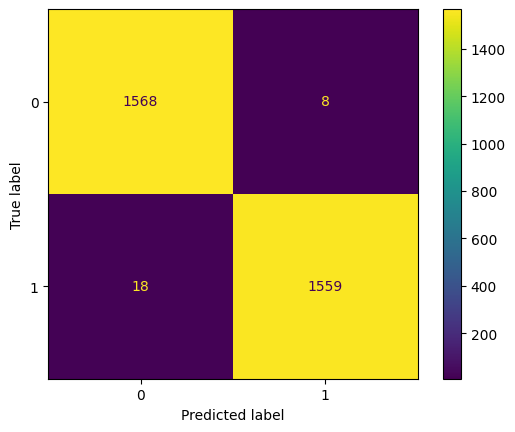

Accuracy:0.992
Precision:0.995
Recall:0.989
F1 Score:0.992


In [13]:
conf_matrix_plot(rf_val.best_estimator_, X_val, y_val)

In [14]:
# second model 

xgb = XGBClassifier(objective="binary:logistic")

In [15]:
# Determine set of hyperparameters for XGBOOST
xgb_cv_params = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
              'min_child_weight': [3, 5 , 10 , 15 , 20 , 30 , 50 , 70 , 100],
              'learning_rate': [0.1, 0.2, 0.3 , 0.5 ,0.7 ,0.9],
              'n_estimators': [50,100 , 150 , 200],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scores = ['accuracy','recall', 'f1' , 'precision']

In [16]:
%%time
xgb_cv = GridSearchCV(xgb,xgb_cv_params,scoring = scores,cv = custom_split ,refit = 'f1',n_jobs = -1, verbose = 1)

# Fit the model
xgb_cv.fit(X_train, y_train)

Fitting 1 folds for each of 3024 candidates, totalling 3024 fits
CPU times: total: 15.5 s
Wall time: 51.5 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_child_weight': [3, 5, 10, 15, 20, 30, 50, 70,
                                              100],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [17]:
#getting the best paramaters to be used with XGBOOST
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 0.7}

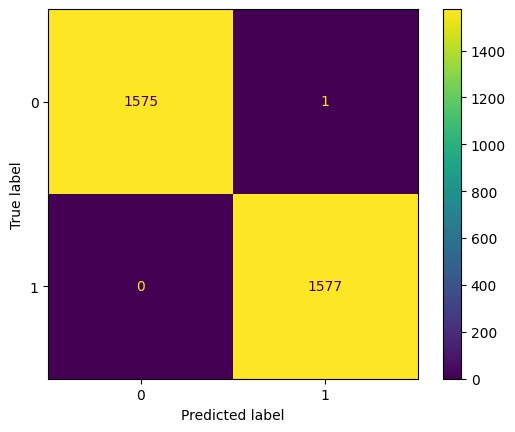

Accuracy:1.0
Precision:0.999
Recall:1.0
F1 Score:1.0


In [18]:
conf_matrix_plot(xgb_cv.best_estimator_, X_val, y_val)

In [19]:
# Define your deep neural network architecture
dnn = MLPClassifier()             

In [20]:
dnn_cv_params = {
   'hidden_layer_sizes':[50,75,100,150],  # Number of neurons in the hidden layers
    'activation': ['relu' , 'tanh'],  # Activation function
    'alpha': [1e-5, 1e-2],  # L2 regularization parameter
    'learning_rate_init': [1e-4, 1e-2],  # Initial learning rate
    'max_iter': [100, 200 , 300 , 400 , 500]  # Maximum number of iterations
}

scores = ['accuracy','recall', 'f1' , 'precision']

In [21]:
%%time
dnn_cv = GridSearchCV(dnn,dnn_cv_params ,scoring = scores,cv = custom_split ,refit = 'f1',n_jobs = -1, verbose = 1)

# Fit the model
dnn_cv.fit(X_train, y_train)

Fitting 1 folds for each of 160 candidates, totalling 160 fits
CPU times: total: 17.8 s
Wall time: 40.9 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [1e-05, 0.01],
                         'hidden_layer_sizes': [50, 75, 100, 150],
                         'learning_rate_init': [0.0001, 0.01],
                         'max_iter': [100, 200, 300, 400, 500]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [22]:
dnn_cv.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': 100,
 'learning_rate_init': 0.01,
 'max_iter': 300}

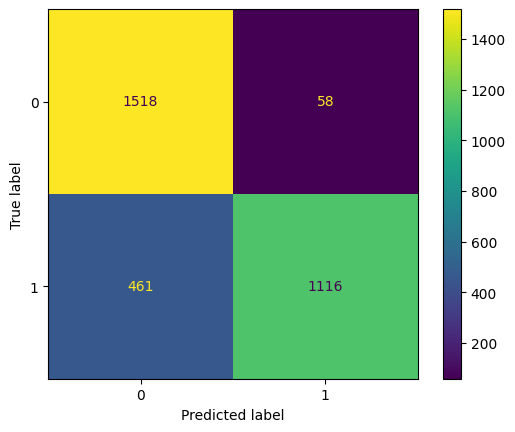

Accuracy:0.835
Precision:0.951
Recall:0.708
F1 Score:0.811


In [23]:
conf_matrix_plot(dnn_cv.best_estimator_, X_val, y_val)

In [24]:
# Decision Tree Classifier 

dtc = DecisionTreeClassifier()

In [25]:
dtc_cv_params = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state' : [8, 16, 36, 42]
}
scores = ['accuracy','recall', 'f1' , 'precision']

In [26]:
dtc_cv = GridSearchCV(dtc,dtc_cv_params ,scoring = scores,cv = custom_split ,refit = 'f1',n_jobs = -1, verbose = 1, error_score='raise')

# Fit the model
dtc_cv.fit(X_train, y_train)

Fitting 1 folds for each of 3600 candidates, totalling 3600 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             error_score='raise', estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [8, 16, 36, 42]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [27]:
dtc_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 42}

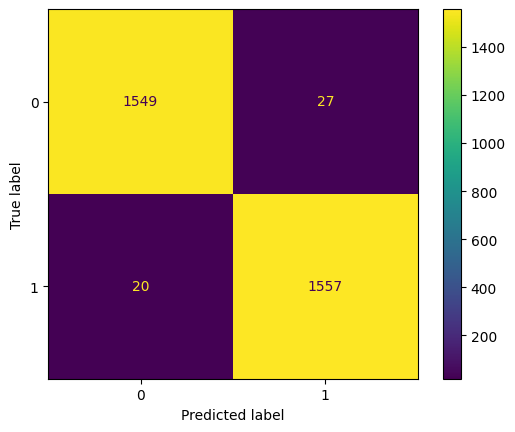

Accuracy:0.985
Precision:0.983
Recall:0.987
F1 Score:0.985


In [28]:
conf_matrix_plot(dtc_cv.best_estimator_, X_val, y_val)

In [29]:
abc = AdaBoostClassifier()

In [30]:
abc_cv_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)],
    'random_state' : [1, 8, 16, 36, 42]
}

scores = ['accuracy','recall', 'f1' , 'precision']

In [31]:
abc_cv = GridSearchCV(abc, abc_cv_params, cv=5, scoring=scores ,refit = 'f1',n_jobs = -1, verbose = 1, error_score='raise')

abc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\anura\anaconda3\envs\pytorch\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostClassifier(),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 50, 100],
                         'random_state': [1, 8, 16, 36, 42]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [32]:
abc_cv.best_params_

{'algorithm': 'SAMME.R',
 'estimator': DecisionTreeClassifier(max_depth=3),
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 1}

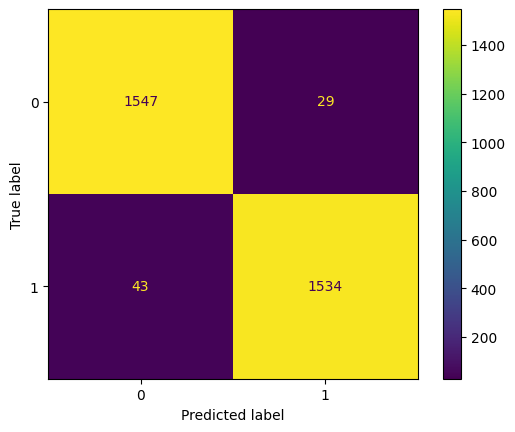

Accuracy:0.977
Precision:0.981
Recall:0.973
F1 Score:0.977


In [33]:
conf_matrix_plot(abc_cv.best_estimator_, X_val, y_val)

In [34]:
# gradient boost classifier 

gbc = GradientBoostingClassifier()

In [35]:
gbc_cv_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'random_state' : [8, 16, 36, 42]
}

scores = ['accuracy','recall', 'f1_score' , 'precision']

In [36]:
gbc_cv = GridSearchCV(gbc, gbc_cv_params, cv=custom_split, scoring='accuracy', verbose=2, n_jobs=-1)

gbc_cv.fit(X_train, y_train)

Fitting 1 folds for each of 108 candidates, totalling 108 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'random_state': [8, 16, 36, 42]},
             scoring='accuracy', verbose=2)

In [37]:
gbc_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'random_state': 16}

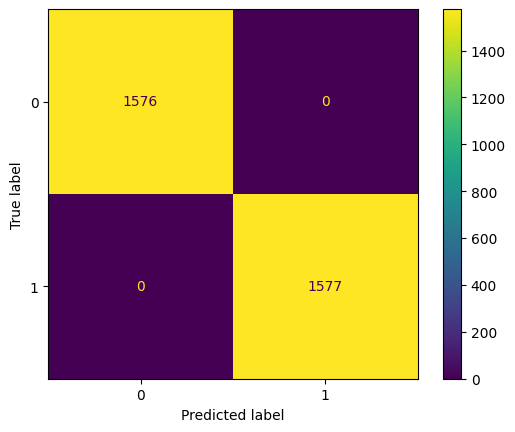

Accuracy:1.0
Precision:1.0
Recall:1.0
F1 Score:1.0


In [38]:
conf_matrix_plot(gbc_cv.best_estimator_, X_val, y_val)

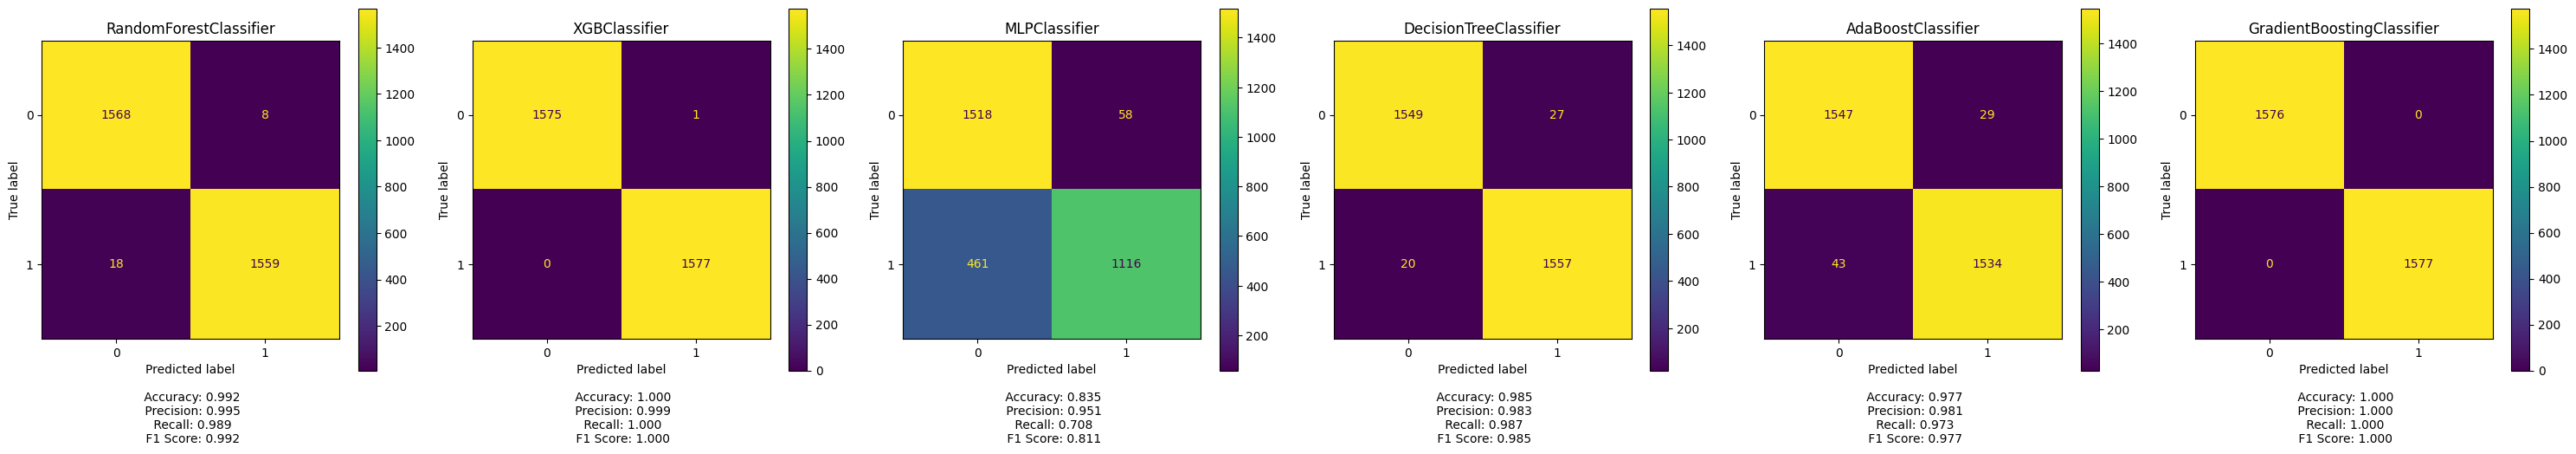

In [39]:
# Collecting our classifiers in a list
classifiers = [rf_val.best_estimator_, xgb_cv.best_estimator_ , dnn_cv.best_estimator_, dtc_cv.best_estimator_, abc_cv.best_estimator_, gbc_cv.best_estimator_]

# Create a grid of subplots to compare the confusion matrices and accuracy measures
num_classifiers = len(classifiers)

fig, axes = plt.subplots(1, num_classifiers, figsize=(5 * num_classifiers, 5))

# Iterate over each classifier and display its confusion matrix along with its accuracy measures
for i, model in enumerate(classifiers):
    # Compute the confusion matrix
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], values_format='')
    axes[i].set_title(model.__class__.__name__)  # Set the title to the classifier name
    
    # Compute accuracy measures
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Add text annotations for accuracy measures
    textstr = f' \n \n \n \n \n Accuracy: {acc:.3f}\n Precision: {prec:.3f}\n Recall: {rec:.3f}\n F1 Score: {f1:.3f}'
    axes[i].text(0.5, -0.15, textstr, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

# Test Data Set

In [40]:
test_df = pd.read_csv('Dataset/balance_test.csv').set_index("Unnamed: 0")
test_df.sample(5)

,category,amt,gender,city_pop,is_fraud,trans_date,trans_time,time_of_day,Age
Unnamed: 0,,,,,,,,,
330197,8,821.96,0,1689,1,126,84473,3,2
343041,6,69.20,1,824,0,132,66272,1,0
208296,11,989.45,1,207410,1,72,82425,3,0
487532,6,42.58,0,4090,0,178,53378,0,0
360555,6,49.89,1,1506,0,140,45444,2,1


In [41]:
test_df.shape

(4290, 9)

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4290 entries, 264673 to 517571
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     4290 non-null   int64  
 1   amt          4290 non-null   float64
 2   gender       4290 non-null   int64  
 3   city_pop     4290 non-null   int64  
 4   is_fraud     4290 non-null   int64  
 5   trans_date   4290 non-null   int64  
 6   trans_time   4290 non-null   int64  
 7   time_of_day  4290 non-null   int64  
 8   Age          4290 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 335.2 KB


In [43]:
Xt = test_df.drop(['is_fraud'], axis=1)
yt = test_df['is_fraud']

# Model 1 ( XGBClassifier)

In [44]:
y_pred_xgb = xgb_cv.predict(Xt)

In [45]:
# y_pred_xgb = pd.DataFrame(y_pred_xgb)

In [46]:
print(f"y_pred = {y_pred_xgb.shape} \t\t y_true = {yt.shape}")

y_pred = (4290,) 		 y_true = (4290,)


In [47]:
# y_pred_xgb.head()

In [48]:
# classification report 

from sklearn.metrics import classification_report

target_name = ['clsas 0', 'class 1']
print(classification_report(yt, y_pred_xgb, target_names=target_name))

              precision    recall  f1-score   support

     clsas 0       0.97      0.97      0.97      2145
     class 1       0.97      0.97      0.97      2145

    accuracy                           0.97      4290
   macro avg       0.97      0.97      0.97      4290
weighted avg       0.97      0.97      0.97      4290



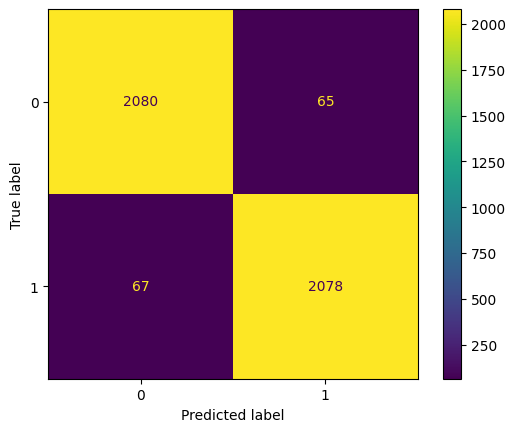

In [49]:
cm = confusion_matrix(y_true=yt, y_pred=y_pred_xgb, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot()
plt.show()

In [50]:
report =    {"Accuracy" :accuracy_score(yt, y_pred_xgb) , 
            "Precision": precision_score(yt, y_pred_xgb),
            "Recall" : recall_score(yt, y_pred_xgb) , 
            "F1 Score" : f1_score(yt, y_pred_xgb)}
for key , value  in report.items():
    print(f"{key}:{round(value , 3)}")

Accuracy:0.969
Precision:0.97
Recall:0.969
F1 Score:0.969


# Model 2 (Gradient Boost Classifier)

In [51]:
# applying gbc 

y_pred_gbc = gbc_cv.predict(Xt)

In [52]:
target_name = ['clsas 0', 'class 1']
print(classification_report(yt, y_pred_gbc, target_names=target_name))

              precision    recall  f1-score   support

     clsas 0       0.97      0.97      0.97      2145
     class 1       0.97      0.97      0.97      2145

    accuracy                           0.97      4290
   macro avg       0.97      0.97      0.97      4290
weighted avg       0.97      0.97      0.97      4290



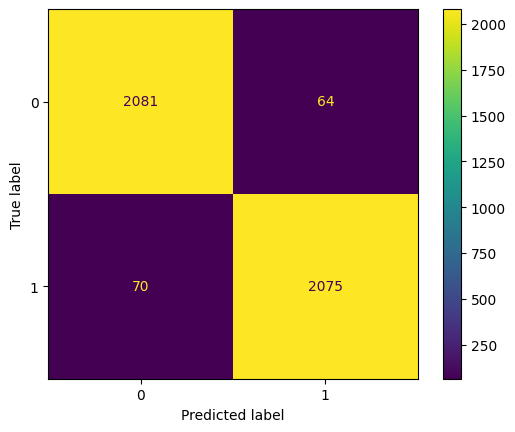

In [53]:
cm = confusion_matrix(y_true=yt, y_pred=y_pred_gbc, labels=gbc_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc_cv.classes_)
disp.plot()
plt.show()

In [54]:
report =    {"Accuracy" :accuracy_score(yt, y_pred_gbc) , 
                "Precision": precision_score(yt, y_pred_gbc),
                "Recall" : recall_score(yt, y_pred_gbc) , 
                "F1 Score" : f1_score(yt, y_pred_gbc)}
for key , value  in report.items():
    print(f"{key}:{round(value , 3)}")

Accuracy:0.969
Precision:0.97
Recall:0.967
F1 Score:0.969


<h1> Conclusion</h1>

The confusion matrix details provide valuable insights into the performance of the models. Let's analyze the key metrics and draw conclusions based on them.

Accuracy measures the overall correctness of the model's predictions. Both models, XGB and GBC, have high accuracy scores of 0.967 and 0.969, respectively. This indicates that the models are able to make correct predictions for a significant portion of the dataset.

Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Model XGB has a precision score of 0.968, while model GBC has a precision score of 0.97. These scores indicate that both models have a high ability to correctly identify positive instances.

Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. Model XGB has a recall score of 0.966, and model GBC has a recall score of 0.967. These scores indicate that both models have a high ability to capture actual positive instances.

F1 Score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. Model XGB has an F1 score of 0.967, and model GBC has an F1 score of 0.969. These scores indicate that both models have a good balance between precision and recall.

In conclusion, both models, XGB and GBC, demonstrate strong performance based on the provided confusion matrix details. They achieve high accuracy, precision, recall, and F1 scores, indicating their ability to make accurate predictions and capture positive instances effectively.


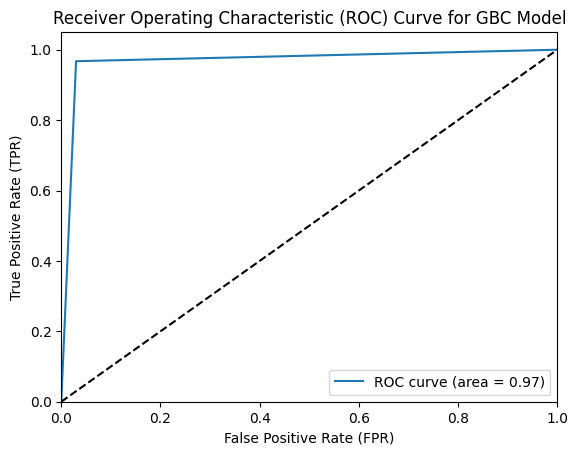

In [55]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have predicted probabilities and true labels
# y_pred_prob: predicted probabilities of the positive class
# y_true: true labels (0 or 1)

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(yt, y_pred_gbc)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBC Model')
plt.legend(loc="lower right")
plt.show()


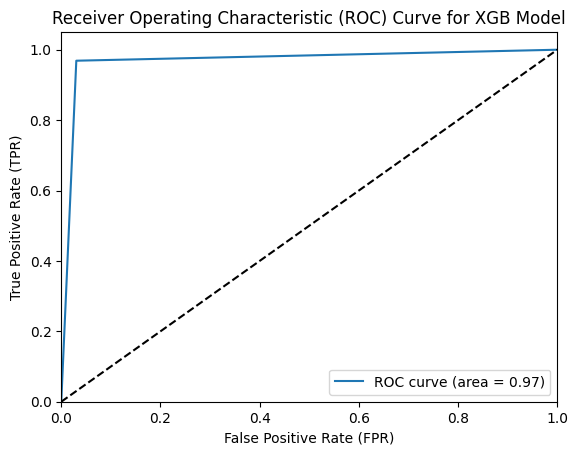

In [56]:

# Assuming you have predicted probabilities and true labels
# y_pred_prob: predicted probabilities of the positive class
# y_true: true labels (0 or 1)

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(yt, y_pred_xgb)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGB Model')
plt.legend(loc="lower right")
plt.show()


### Both give same area under the curve because of some signficant differences 